## explore

1. Spam Data

    a. Load the spam data set.
    
    b. Create and explore bigrams for the spam data.
        - Visualize them with a word cloud.
        - How do they compare with the ham bigrams?

    c. Is there any overlap in the bigrams for the spam data and the ham data?

    d. Create and explore with trigrams (*i.e. a n-gram with an n of 3*) for both the spam and ham data.
    
    
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson.
    - Use the category variable when exploring.

#### Prepare the environment.

In [1]:
import pandas as pd
import csv

import re
import unicodedata
import nltk

from prepare import basic_clean, lemmatize, remove_stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachelreuter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*When working blog data, use the pd.from_dict(file) to change to dataframe.*

In [ ]:
pd.DataFrame.from_dict(data)

#### Load the spam data set.

In [2]:
df = pd.read_csv('/Users/rachelreuter/ds-methodologies/nlp/spam_clean.csv')

#### Cleaning and converting the data for use.

In [8]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

'good morning ada data exploration'

In [9]:
df.text = df.text.apply(clean)

In [21]:
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)

In [28]:
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [31]:
all_freq = pd.Series(all_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
ham_freq = pd.Series(ham_text.split()).value_counts()

#### Converting data to counts.

In [34]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis = 1)
word_counts.columns = ['all','spam','ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))
word_counts

,all,spam,ham
0,3,3,0
008704050406,2,2,0
0089my,1,1,0
0121,1,1,0
01223585236,1,1,0
01223585334,2,2,0
0125698789,1,0,1
02,1,1,0
020603,4,4,0
0207,2,2,0


In [35]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1197,155,1042
call,600,359,241
2,478,173,305
im,462,13,449
not,430,24,406
get,397,83,314
ur,384,144,240
no,335,61,274
go,304,31,273
4,287,119,168


Let's first take a look at how many of the messages are spam vs ham:

In [36]:
word_counts['p_spam'] = word_counts.spam / word_counts['all']
word_counts['p_ham'] = word_counts.ham / word_counts['all']
word_counts

,all,spam,ham,p_spam,p_ham
0,3,3,0,1.000000,0.000000
008704050406,2,2,0,1.000000,0.000000
0089my,1,1,0,1.000000,0.000000
0121,1,1,0,1.000000,0.000000
01223585236,1,1,0,1.000000,0.000000
01223585334,2,2,0,1.000000,0.000000
0125698789,1,0,1,0.000000,1.000000
02,1,1,0,1.000000,0.000000
020603,4,4,0,1.000000,0.000000
0207,2,2,0,1.000000,0.000000


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

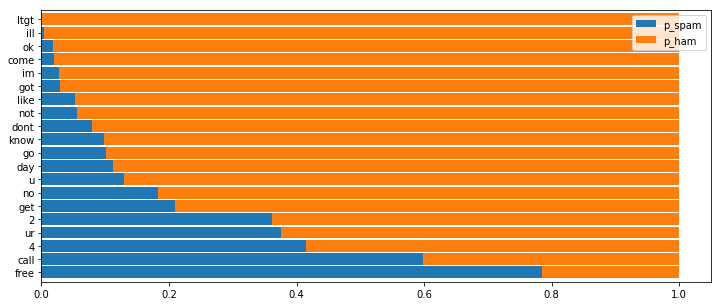

In [38]:
word_counts.sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True, figsize=(12,5), width=.9)

In [39]:
word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]\
    .assign(ratio=lambda df: df.spam / df.ham)\
    .sort_values(by='ratio')

,all,spam,ham,p_spam,p_ham,ratio
im,462,13,449,0.028139,0.971861,0.028953
good,235,12,223,0.051064,0.948936,0.053812
like,245,13,232,0.053061,0.946939,0.056034
not,430,24,406,0.055814,0.944186,0.059113
need,182,11,171,0.060440,0.939560,0.064327
dont,279,22,257,0.078853,0.921147,0.085603
time,232,19,213,0.081897,0.918103,0.089202
think,146,14,132,0.095890,0.904110,0.106061
know,267,26,241,0.097378,0.902622,0.107884
great,111,11,100,0.099099,0.900901,0.110000


#### Create and explore bigrams for the spam data.
    - Visualize them with a word cloud.
    - How do they compare with the ham bigrams?

In [40]:
# pip install WordCloud
from wordcloud import WordCloud

(-0.5, 1199.5, 999.5, -0.5)

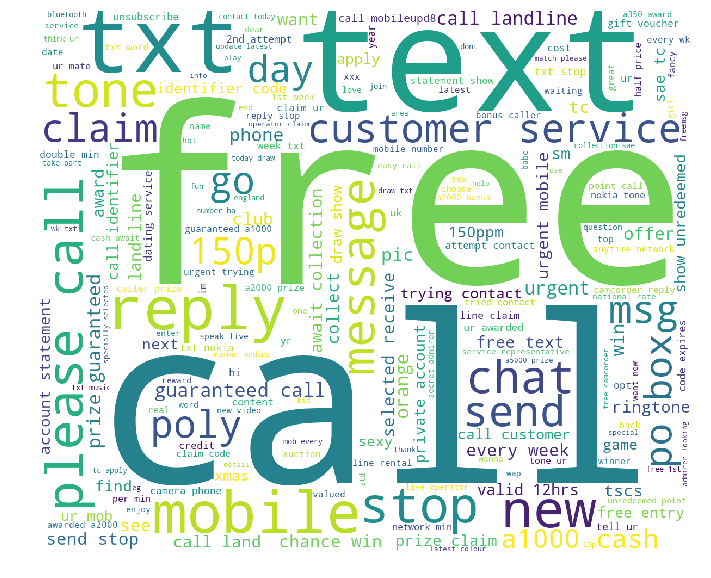

In [47]:
cloud = WordCloud(background_color='white', width=1200, height=1000).generate(spam_text)
plt.figure(figsize=(12,10))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 599.5, 799.5, -0.5)

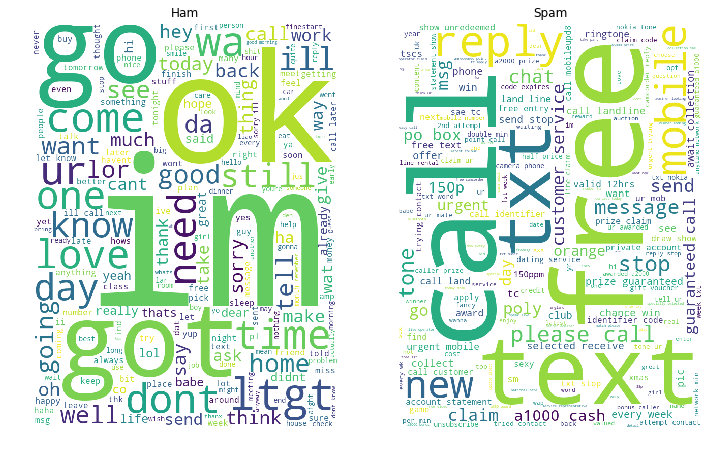

In [42]:
ham_cloud = WordCloud(background_color='white', width=600, height=800).generate(ham_text)
spam_cloud = WordCloud(background_color='white', width=600, height=800).generate(spam_text)

plt.figure(figsize=(12, 10))

plt.subplot(121)
plt.imshow(ham_cloud)
plt.title('Ham')
plt.axis('off')

plt.subplot(122)
plt.imshow(spam_cloud)
plt.title('Spam')
plt.axis('off')

#### Create and explore bigrams for the spam data.
    - Visualize them with a word cloud.
    - How do they compare with the ham bigrams?

In [43]:
import nltk

In [48]:
list(nltk.ngrams('Mary had a little lamb'.split(), 2))

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

### the two sets of bigrams are are tuples, they need to be turned into dictionaries for the wordclouds, and then they need to be turned into something else to compare them.

In [49]:
pd.Series(nltk.ngrams(spam_text.split(), 2)).value_counts().head(20)

(please, call)          44
(customer, service)     27
(po, box)               24
(contact, u)            24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(every, week)           19
(await, collection)     19
(send, stop)            19
(urgent, mobile)        18
(land, line)            18
(claim, call)           17
(valid, 12hrs)          17
(2, claim)              17
(account, statement)    16
(call, 08000930705)     16
(sae, tc)               16
(trying, contact)       15
(call, mobileupd8)      15
dtype: int64

In [50]:
pd.Series(nltk.ngrams(ham_text.split(), 2)).value_counts().head(20)

(call, later)      52
(ill, call)        48
(let, know)        41
(im, not)          39
(sorry, ill)       39
(r, u)             37
(u, r)             34
(dont, know)       32
(wan, 2)           31
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        23
(u, get)           23
(u, wan)           23
(pls, send)        22
(ok, lor)          22
(no, need)         22
(not, sure)        21
(ltgt, min)        19
dtype: int64

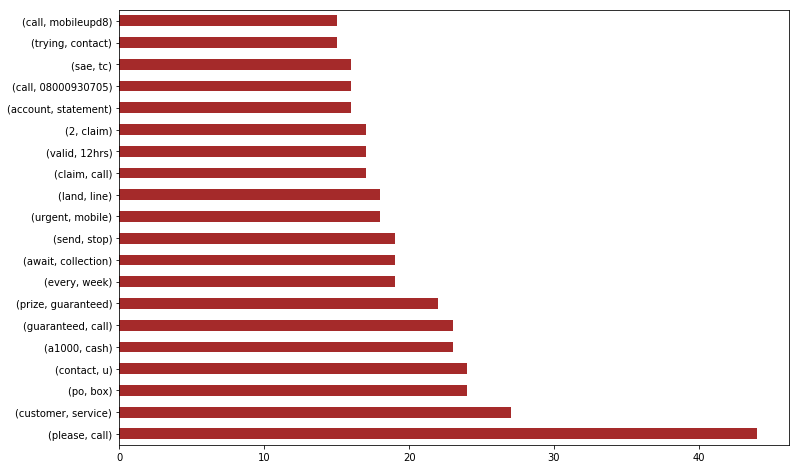

In [58]:
spam_bigrams = pd.Series(nltk.ngrams(spam_text.split(), 2))\
    .value_counts()

spam_bigrams\
    .head(20)\
    .plot.barh(figsize=(12,8),color='Brown')

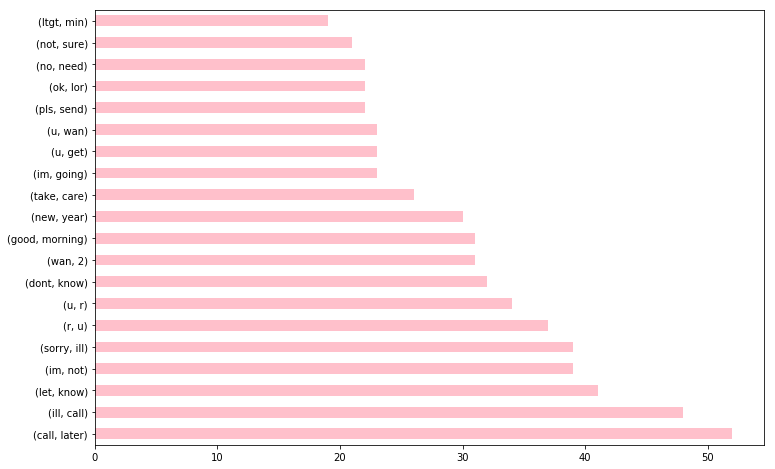

In [59]:
ham_bigrams = pd.Series(nltk.ngrams(ham_text.split(), 2))\
    .value_counts()

ham_bigrams\
    .head(20)\
    .plot.barh(figsize=(12,8),color='Pink')

    c. Is there any overlap in the bigrams for the spam data and the ham data?

    d. Create and explore with trigrams (*i.e. a n-gram with an n of 3*) for both the spam and ham data.
    
    
2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson.
    - Use the category variable when exploring.